# Adaptable Earth3 Model

Taken from the idea and development of Johan Rockström and his amazing team.

$\textbf{modified by}$: Jonatan Blank Hall

$\textbf{contanct}$: blankhall@ciencias.unam.mx


El propósito de este modelo es el de:
- poder recibir bases de datos reelevantes al problema
- clasificar la información entre las 7 regiones de interés
- correlacionar variables para poder realizar predicciones en las 17 metas sustentables
- dada una ponderación y las predicciones para las metas, calificar de manera adecuada el progreso regional y global en el cumplimiento de las metas sustentables.

### External Libraries

Se utilizan las siguientes librerías externas.
- Pandas: Facilita la manipulación de bases de datos.
- Numpy: Facilita cálculos y operaciones numéricas.
- Matplotlib: Librería para gráficas.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Style Libraries

Las siguientes librerías sirven para dar un mejor estilo al cuaderno de notebook, pero no son necesarias para el funcionamiento del programa fuera de este ambiente

In [119]:
import warnings
warnings.filterwarnings('ignore')

## RAW DATABASES

El siguiente diccionario contiene las rutas de las bases de datos reelevantes para inicializar el modelo. Estas son:
1. GDPpp .......... Gross Domestic Product per Person
2. Pop .......... Population
3. SDG .......... SDG indicator's historic data

In [2]:
data_dir = './data/'
data = {
    'GDPpp': 'GDPpp.csv',
    'Pop': 'Population.csv',
    'SDG': 'SDG1-7.csv',
    'Thresh': 'Threshold.csv'
}

A continuación se analiza cada una de las bases de datos que se ingresarán al modelo, para poder arreglarlas de forma óptima, e indagar inicialmente en su contenido.

### Gross Domestic Product per Person

In [10]:
route = data_dir + data['GDPpp']
gdp = pd.read_csv(route)

In [11]:
gdp

,Region,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,United States,27.351715,29.335090,33.994440,36.619197,42.372128,47.043068,49.062768,49.350465,49.742955,50.211717,50.734671,51.294687,51.878494,52.475859,53.078945
1,Other Rich Countries,16.244633,16.803550,20.480301,24.154262,28.327163,31.073882,34.168039,35.817183,37.442064,39.022346,40.543422,41.995692,43.373740,44.675492,45.901427
2,China,1.605271,2.053859,2.583165,3.306449,4.316882,5.890360,8.749859,11.369707,14.471868,18.010351,21.881334,25.938388,30.019380,33.974404,37.685754
3,Emerging Economies,4.125767,4.338181,9.671323,9.316431,9.019540,10.134587,14.107565,16.634089,19.443921,22.463829,25.603012,28.765365,31.861745,34.819145,37.585329
4,Indian Subcontinent,1.243175,1.125725,1.259638,1.485741,1.828265,2.241556,3.304625,4.331546,5.612334,7.205065,9.165889,11.535621,14.324012,17.497428,20.976245
5,Africa South of Sahara,3.386362,3.047015,1.940107,1.621212,1.655388,2.071162,2.993080,3.423746,4.004372,4.763725,5.739614,6.976597,8.521369,10.414867,12.681394
6,Rest of World,2.337560,2.554112,3.362027,3.418557,3.840009,4.126970,5.591882,6.977245,8.690803,10.775651,13.252684,16.108473,19.289044,22.703454,26.236931


### Population

In [12]:
route = data_dir + data['Pop']
pop = pd.read_csv(route)

In [13]:
pop

,Region,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,United States,233,244,256,270,286,299,313,324,329,333,335,336,337,337,335
1,Other Rich Countries,641,658,674,691,704,720,736,748,750,750,749,744,738,728,714
2,China,1017,1096,1199,1268,1312,1352,1390,1428,1460,1483,1496,1498,1489,1466,1431
3,Emerging Economies,603,658,711,751,786,818,852,890,916,936,950,959,963,962,957
4,Indian Subcontinent,856,967,1084,1202,1323,1441,1554,1660,1762,1857,1939,2004,2051,2077,2084
5,Africa South of Sahara,284,328,378,439,500,570,652,746,828,906,980,1048,1108,1160,1202
6,Rest of World,810,906,1008,1106,1205,1308,1418,1539,1646,1739,1816,1876,1922,1953,1973


### Sustainable Development Goals

In [14]:
route = data_dir + data['SDG']
sdg = pd.read_csv(route)

In [15]:
sdg

,SDG,Region,Abreviation,Functional form,Sc1a,Sc1b,Sc1c,Sc1d,1980,1985,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,1.0,United States,US,y=b*EXP(-x/c),0.0,100.00,6.200,0.0,0.70000,0.88135,...,2.00000,2.00000,2.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Other Rich Countries,ORC,y=b*EXP(-x/c),0.0,100.00,4.000,0.0,1.72291,0.81343,...,0.52050,0.33654,0.38514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,China,China,y=b*EXP(-x/c),0.0,140.00,3.600,0.0,89.63393,79.13268,...,25.40000,12.95000,5.43333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,Emerging Economies,EE,y=b*EXP(-x/c),0.0,100.00,3.000,0.0,25.27750,17.87430,...,5.28140,2.81891,1.71643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,Indian Subcontinent,India,y=b*EXP(-x/c),0.0,100.00,2.000,0.0,53.70910,52.05170,...,35.00385,27.62665,19.40532,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,Africa South of Sahara,ASoS,y=b*EXP(-x/c),0.0,100.00,3.200,0.0,34.70668,41.10578,...,52.28370,42.54003,44.17450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,Rest of World,RoW-120,y=b*EXP(-x/c),0.0,100.00,3.400,0.0,50.28228,47.17956,...,25.10576,17.98693,10.15964,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2.0,United States,US,y=a+b*EXP(-x/c),2.5,32.50,4.700,0.0,2.59649,2.56327,...,2.50000,2.50000,2.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2.0,Other Rich Countries,ORC,y=a+b*EXP(-x/c),2.5,32.50,4.700,0.0,3.52525,3.41030,...,2.55349,2.53425,2.52450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2.0,China,China,y=a+b*EXP(-x/c),2.5,32.50,6.700,0.0,28.07582,26.41950,...,15.64000,13.44000,10.38000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


El aporte que se busca dar a través de este código, es el de un modelo E3, que cumpla con las instrucciones ya indicadas, pero que pueda ser transportado fácilmente a una web app, sus bases de datos sustituidas (o actualizadas), y se pueda preguntar fácilmente por variables/valores de interés una vez terminada la modelación.

Para esto, se decide construir el modelo como una interacción de clases.

## CLASS: SDG

In [16]:
class SDG:
    
    def __init__(self):
        pass
    
    def performance(self,goal):
        pass

## CLASS: REGION

Esta clase se construye con la finalidad de contener toda la información histórica, parámetros de regresión específicos, y los valores predichos.

De esta forma, la interacción con las Regiones y sus resultados puede lograrse de manera óptima, replicable y adaptable.

In [289]:
#This class is built to contain the Region's information on:
#    1. Population
#    2. Gross Domestic Product
#    3. Sustainable Development Goals

class Region:
    
    #Definition ----------
    
    def __init__(self,region,pop,gdp,sdg,parameters):
        self.region = region
        self.pop = pop
        self.gdp = gdp
        self.sdg = sdg
        
        #definition of the time periods.
        self.historical = ['1980','1985','1990','1995','2000','2005','2010','2015']
        self.prediction = ['2020','2025','2030','2035','2040','2045','2050']
        self.timelapse = ['1980','1985','1990','1995','2000','2005','2010','2015',
                         '2020','2025','2030','2035','2040','2045','2050']
        
        #correlation formulas
        self.formulas = {
            '1': lambda x,a: self.params['1'][0]*np.exp(-a*x),
            '2': lambda x,a,b: a*np.exp(-b*x),
            '3': lambda x,a,b: a*np.exp(-b*x),
            '4': lambda x,a,b: a*np.exp(-b*x),
            '5': lambda x,a,b: a*np.exp(-b*x),
            '6': lambda x,a,b: a*np.exp(-b*x),
            '7': lambda x,a,b: a*np.exp(-b*x),
        }
        
        #correlation parameters
        self.params = parameters
        
        #fitting results
        self.results = {}
        
        #Initial Actions
        self.correlate_all()
        self.predict_all()
        
    def __repr__(self):
        return self.region
    
    #Actions ----------
    
    def ponderate(self):
        pass
    
    def correlate(self,goal):
        func = self.formulas[str(int(goal))]
        
        s = self.sdg[self.sdg['SDG']==goal]
        gdp_data = self.gdp[self.historical].values.tolist()[0]
        sdg_data = s[self.historical].values.tolist()[0]
        
        popt, pcov = curve_fit(func, gdp_data, sdg_data)
        self.results[str(int(goal))] = popt
        
    def correlate_all(self):
        goals = [1.0,2.0,3.0,4.0,5.0,6.0,7.0]
        for goal in goals:
            self.correlate(goal)
    
    def predict(self,goal):
        func = self.formulas[str(int(goal))]
        for year in self.prediction:
            g = self.gdp[year].values.tolist()[0]
            v = func(g,*self.results[str(int(goal))])
            self.sdg.loc[self.sdg['SDG']==goal,[year]] = v
    
    def predict_all(self):
        goals = [1.0,2.0,3.0,4.0,5.0,6.0,7.0]
        for goal in goals:
            self.predict(goal)
    
    #Plots ----------
    
    #Plot Population - 
    def ppop(self):
        plt.figure(figsize=(12,8))
        plt.title(f'{self.region}:'+'\n'+'Population')
        plt.plot(self.historical,self.pop[self.historical].values.tolist()[0],label="historical")
        plt.plot(self.prediction,self.pop[self.prediction].values.tolist()[0],label="prediction")
        plt.xlabel('Year')
        plt.ylabel('Population (millions)')
        plt.legend()
        plt.show()
    
    #Plot Gross Domestic Product
    def pgdp(self):
        plt.figure(figsize=(12,8))
        plt.title(f'{self.region}:'+'\n'+'GDP pp')
        plt.plot(self.historical,self.gdp[self.historical].values.tolist()[0],label="historical")
        plt.plot(self.prediction,self.gdp[self.prediction].values.tolist()[0],label="prediction")
        plt.xlabel('Year')
        plt.ylabel('Gross Domestic Product Per Person (US Dollar 2011)')
        plt.legend()
        plt.show()
    
    #Plot Sustainable Development Goal
    def psdg(self,goal):
        plt.figure(figsize=(12,8))
        plt.title(f'{self.region}:' + '\n' + f'SDG {goal} Historical Record')
        plt.plot(self.historical,self.sdg[self.sdg['SDG']==goal][self.historical].values.tolist()[0])
        plt.xlabel('Year')
        plt.ylabel(f'SDG {goal} Indicator')
        plt.show()
    
    #Plot Relationship between GDP and SDG
    def pgdpXsdg(self,goal):
        s = self.sdg[self.sdg['SDG']==goal]
        g_domain = np.linspace(0,max(self.gdp[self.historical].values.tolist()[0])+20)
        s_fit = [self.formulas[str(int(goal))](x,*self.results[str(int(goal))]) for x in g_domain]
        
        plt.figure(figsize=(12,8))
        plt.title(f'{self.region}:' + '\n' + f'Graphical Correlation Between SDG {goal} and GDP pp')
        plt.plot(self.gdp[self.historical].values.tolist()[0],s[self.historical].values.tolist()[0],'o',label="Valores Históricos")
        plt.plot(g_domain,s_fit,label="Valores Ajustados")
        plt.xlabel('Gross Domestic Product Per Person (US Dollar 2011)')
        plt.ylabel(f'SDG {goal}')
        plt.legend()
        
    #Plot SDG predictions
    def psdgpred(self,goal):
        s = self.sdg[self.sdg['SDG']==goal]
        plt.figure(figsize=(12,8))
        plt.title(f'{self.region}'+'\n'+f'SDG {goal} Historical and Prediction Values')
        plt.plot(self.historical,s[self.historical].values.tolist()[0],'o',label="Historical")
        plt.plot(self.prediction,s[self.prediction].values.tolist()[0],'o',label="Prediction")
        plt.legend()
        plt.xlabel("Year")
        plt.ylabel(f'SDG {goal} Indicator')
        

## CLASS: EARTH

In [292]:
class Earth:
    
    def __init__(self,pop,gdp,sdg):
        self.pop = pop
        self.gdp = gdp
        self.sdg = sdg
        
        #Parameters
        self.params = {
            'United States': {'1':[100]},
            'China': {'1':[140]},
            'Emerging Economies': {'1':[100]},
            'Africa South of Sahara': {'1':[100]},
            'Indian Subcontinent': {'1':[100]},
            'Other Rich Countries': {'1':[100]},
            'Rest of World': {'1':[100]}
        }
        
        #ACTIONS
        self.create_regions()
            
    def fix_region(self,region):
        region_pop = self.pop[self.pop['Region']==region].reset_index(drop=True)
        region_gdp = self.gdp[self.gdp['Region']==region].reset_index(drop=True)
        region_sdg = self.sdg[self.sdg['Region']==region].reset_index(drop=True)
        r = Region(region,region_pop,region_gdp,region_sdg,self.params[region])
        return r
    
    def create_regions(self):
        self.usa = self.fix_region("United States")
        self.china = self.fix_region("China")
        self.ee = self.fix_region("Emerging Economies")
        self.africa = self.fix_region("Africa South of Sahara")
        self.india = self.fix_region("Indian Subcontinent")
        self.rich = self.fix_region("Other Rich Countries")
        self.rest = self.fix_region("Rest of World")
    
    #PLOTS
    def ppop(self):
        plt.figure(figsize=(12,8))
        
        plt.plot(self.usa.timelapse,self.usa.pop[self.usa.timelapse].values.tolist()[0],label="USA")
        plt.plot(self.china.timelapse,self.china.pop[self.china.timelapse].values.tolist()[0],label="CHINA")
        plt.plot(self.ee.timelapse,self.ee.pop[self.ee.timelapse].values.tolist()[0],label="Emerging Economies")
        plt.plot(self.africa.timelapse,self.africa.pop[self.africa.timelapse].values.tolist()[0],label="Africa Sub Sahara")
        plt.plot(self.india.timelapse,self.india.pop[self.india.timelapse].values.tolist()[0],label="Indian Sub Continent")
        plt.plot(self.rich.timelapse,self.rich.pop[self.rich.timelapse].values.tolist()[0],label="Rich Countries")
        plt.plot(self.rest.timelapse,self.rest.pop[self.rest.timelapse].values.tolist()[0],label="Rest of World")
        
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel('Population (millions)')
        plt.title('Earths Population')
        plt.show()
        
    def pgdp(self):
        plt.figure(figsize=(12,8))
        
        plt.plot(self.usa.timelapse,self.usa.gdp[self.usa.timelapse].values.tolist()[0],label="USA")
        plt.plot(self.china.timelapse,self.china.gdp[self.china.timelapse].values.tolist()[0],label="CHINA")
        plt.plot(self.ee.timelapse,self.ee.gdp[self.ee.timelapse].values.tolist()[0],label="Emerging Economies")
        plt.plot(self.africa.timelapse,self.africa.gdp[self.africa.timelapse].values.tolist()[0],label="Africa Sub Sahara")
        plt.plot(self.india.timelapse,self.india.gdp[self.india.timelapse].values.tolist()[0],label="Indian Sub Continent")
        plt.plot(self.rich.timelapse,self.rich.gdp[self.rich.timelapse].values.tolist()[0],label="Rich Countries")
        plt.plot(self.rest.timelapse,self.rest.gdp[self.rest.timelapse].values.tolist()[0],label="Rest of World")
        
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel('GDP pp')
        plt.title('Earths Gross Domestic Product per person US Dollar 2011)')
        plt.show()
        
    def psdg(self,goal):
        plt.figure(figsize=(12,8))
        
        plt.plot(self.usa.historical,self.usa.sdg[self.usa.sdg['SDG']==goal][self.usa.historical].values.tolist()[0],label="USA")
        plt.plot(self.china.historical,self.china.sdg[self.china.sdg['SDG']==goal][self.china.historical].values.tolist()[0],label="CHINA")
        plt.plot(self.ee.historical,self.ee.sdg[self.ee.sdg['SDG']==goal][self.ee.historical].values.tolist()[0],label="Emerging Economies")
        plt.plot(self.africa.historical,self.africa.sdg[self.africa.sdg['SDG']==goal][self.africa.historical].values.tolist()[0],label="Africa Sub Sahara")
        plt.plot(self.india.historical,self.india.sdg[self.india.sdg['SDG']==goal][self.india.historical].values.tolist()[0],label="Indian Sub Continent")
        plt.plot(self.rich.historical,self.rich.sdg[self.rich.sdg['SDG']==goal][self.rich.historical].values.tolist()[0],label="Rich Countries")
        plt.plot(self.rest.historical,self.rest.sdg[self.rest.sdg['SDG']==goal][self.rest.historical].values.tolist()[0],label="Rest of World")
        
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel(f'SDG {goal} Indicator')
        plt.title(f'Earths Progress on SDG {goal}')
        plt.show()
        
    def psdgpred(self,goal):
        plt.figure(figsize=(12,8))
        
        plt.plot(self.usa.timelapse,self.usa.sdg[self.usa.sdg['SDG']==goal][self.usa.timelapse].values.tolist()[0],label="USA")
        plt.plot(self.china.timelapse,self.china.sdg[self.china.sdg['SDG']==goal][self.china.timelapse].values.tolist()[0],label="CHINA")
        plt.plot(self.ee.timelapse,self.ee.sdg[self.ee.sdg['SDG']==goal][self.ee.timelapse].values.tolist()[0],label="Emerging Economies")
        plt.plot(self.africa.timelapse,self.africa.sdg[self.africa.sdg['SDG']==goal][self.africa.timelapse].values.tolist()[0],label="Africa Sub Sahara")
        plt.plot(self.india.timelapse,self.india.sdg[self.india.sdg['SDG']==goal][self.india.timelapse].values.tolist()[0],label="Indian Sub Continent")
        plt.plot(self.rich.timelapse,self.rich.sdg[self.rich.sdg['SDG']==goal][self.rich.timelapse].values.tolist()[0],label="Rich Countries")
        plt.plot(self.rest.timelapse,self.rest.sdg[self.rest.sdg['SDG']==goal][self.rest.timelapse].values.tolist()[0],label="Rest of World")
        
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel(f'SDG {goal} Indicator')
        plt.title(f'Earths Progress on SDG {goal}'+'\n'+"Historical and Predictions")
        plt.show()
    

## MAIN

In [293]:
E = Earth(pop,gdp,sdg)

Se puede visualizar las series de tiempo de las poblaciones por región del mundo.

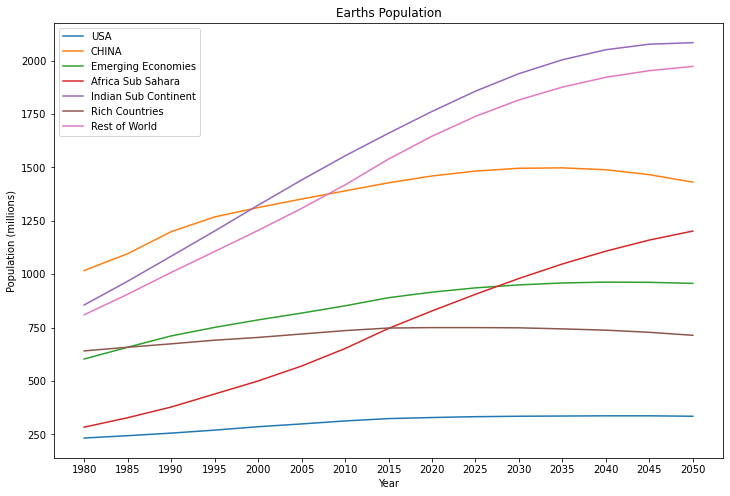

In [247]:
E.ppop()

También se puede visualizar la serie de tiempo del producto interno bruto per cápita para cada una de las regiones del mundo.

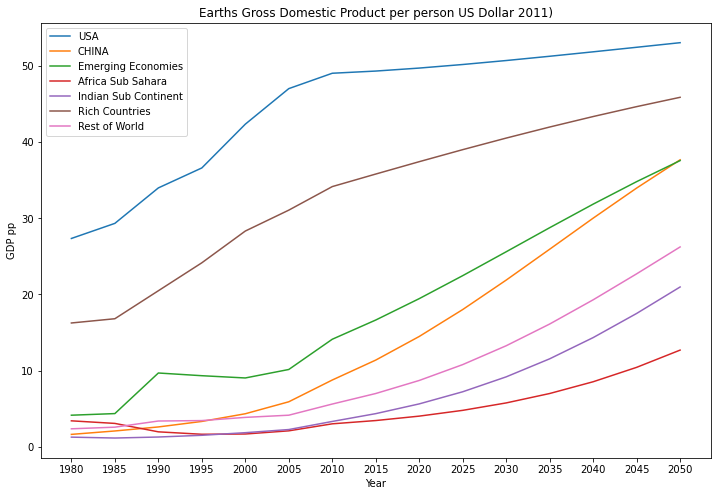

In [249]:
E.pgdp()

El siguiente comando permite visualizar las series de tiempo históricas, por región del mundo, de cada una de las metas de desarrollo sostenible.

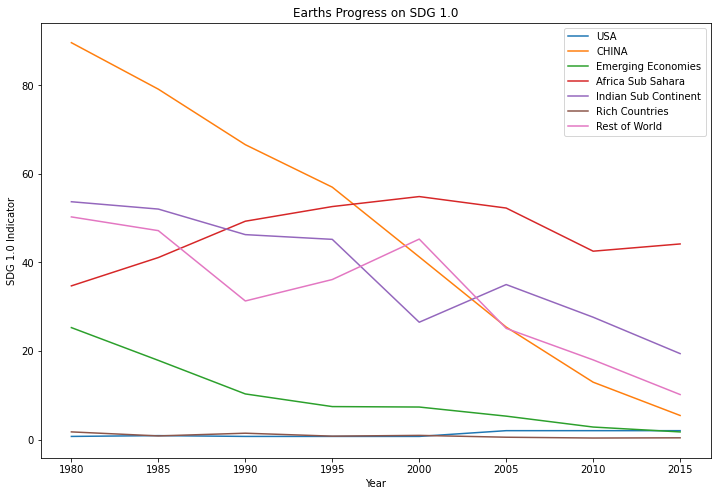

In [252]:
E.psdg(1.0)

Las mismas acciones se pueden repetir a nivel "región", esto con el propósito de analizar a fondo el comportamiento regional.

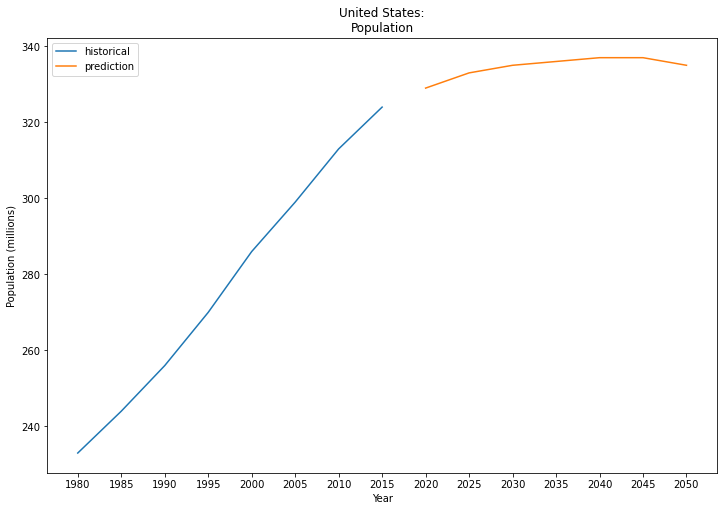

In [254]:
E.usa.ppop()

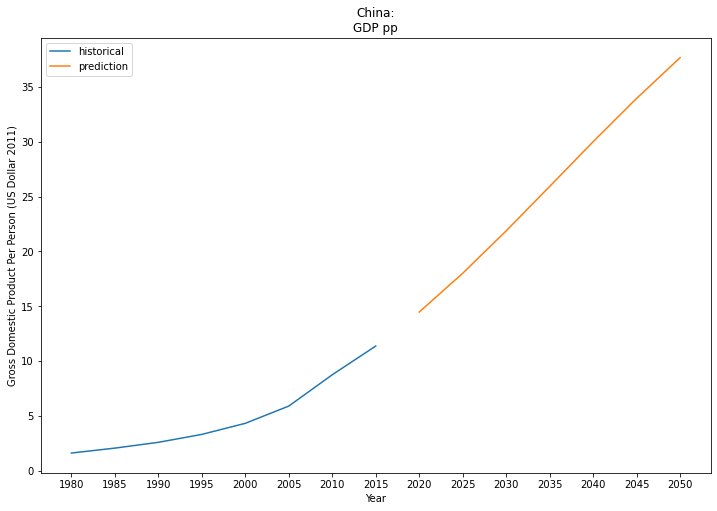

In [256]:
E.china.pgdp()

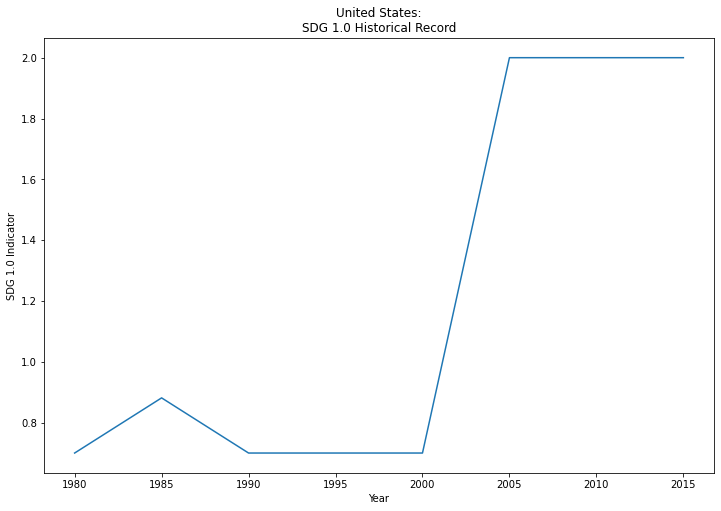

In [262]:
E.usa.psdg(1.0)

Uno de los atributos más importantes a nivel regional es el de poder correlacionar el producto interno bruto per cápita de la región con los valores de alguna meta de desarrollo sostenible para un mismo año. Esta correlación se puede graficar, y además, comparar con un ajuste no lineal de los datos obtenidos:

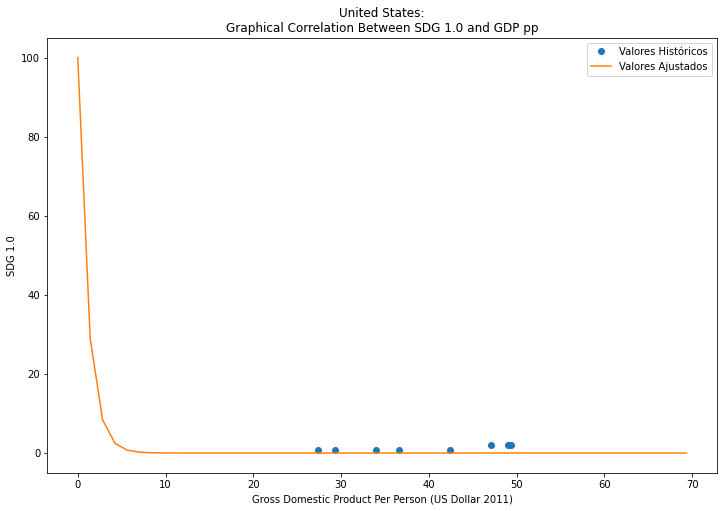

In [295]:
E.usa.pgdpXsdg(1.0)

Se pueden inspeccionar las fórmulas, desde el atributo regional "formulas", con las cuales se realizan los ajustes para cada meta. Además, al inicializar la clase $\textbf{E}$, se ajusta automáticamente las curvas para cada meta considerada, estos valores pueden ser accedidos desde el atributo regional "results".

In [298]:
E.india.formulas

{'1': <function __main__.Region.__init__.<locals>.<lambda>(x, a)>,
 '2': <function __main__.Region.__init__.<locals>.<lambda>(x, a, b)>,
 '3': <function __main__.Region.__init__.<locals>.<lambda>(x, a, b)>,
 '4': <function __main__.Region.__init__.<locals>.<lambda>(x, a, b)>,
 '5': <function __main__.Region.__init__.<locals>.<lambda>(x, a, b)>,
 '6': <function __main__.Region.__init__.<locals>.<lambda>(x, a, b)>,
 '7': <function __main__.Region.__init__.<locals>.<lambda>(x, a, b)>}

In [297]:
E.usa.results

{'1': array([0.87454416]),
 '2': array([1., 1.]),
 '3': array([1., 1.]),
 '4': array([1., 1.]),
 '5': array([1., 1.]),
 '6': array([1., 1.]),
 '7': array([1., 1.])}

Utilizando los parámetros y fórmulas, es posible hacer predicciones del estado de las metas de desarrollo sostenible para los años 2020,2025,...,2050. Inspeccionando las bases de datos de las metas sostenibles por región, podemos ver que los valores para los años de predicción ya están disponibles. Para un mayor análisis de las predicciones, se puede graficar la comparación entre los valores históricos y predicciones.

In [281]:
E.ee.sdg

,SDG,Region,Abreviation,Functional form,Sc1a,Sc1b,Sc1c,Sc1d,1980,1985,...,2005,2010,2015,2020,2025,2030,2035,2040,2045,2050
0,1.0,Emerging Economies,EE,y=b*EXP(-x/c),0.0,100.00,3.00,0.0,25.27750,17.87430,...,5.28140,2.81891,1.71643,0.152147,0.055543,0.019486,0.006783,0.002414,0.000900,0.000358
1,2.0,Emerging Economies,EE,y=a+b*EXP(-x/c),2.5,32.50,4.70,0.0,16.00983,15.41285,...,6.00452,4.06003,3.77347,1.665556,1.069088,0.674315,0.423872,0.269038,0.174282,0.116114
2,3.0,Emerging Economies,EE,y=(a+b*(time – 1965) )*( 1 – c * EXP(-x / d)),71.0,0.18,0.15,28.0,64.60675,65.26759,...,70.40722,72.04708,73.97032,76.254858,78.717188,81.361091,84.114301,86.900326,89.647415,92.295435
3,4.0,Emerging Economies,EE,y=a-b*EXP(-x/c),18.0,12.00,13.00,0.0,9.92868,10.84198,...,13.12100,13.53166,14.67256,15.793300,17.221355,18.842849,20.630715,22.545543,24.540135,26.565182
4,5.0,Emerging Economies,EE,y=a-b*EXP(-x/c),1.1,0.40,8.80,0.0,0.81895,0.87957,...,1.01795,1.04571,1.03961,1.127021,1.187614,1.254056,1.324747,1.397824,1.471380,1.543681
5,6.0,Emerging Economies,EE,y=a-b*EXP(-x/c),100.0,11.00,13.00,0.0,91.99130,92.12109,...,94.97388,96.01216,96.99075,98.413739,99.666414,100.985470,102.331913,103.667659,104.959726,106.182825
6,7.0,Emerging Economies,EE,y=a-b*EXP(-x/c),100.0,70.00,3.90,0.0,75.69684,76.98511,...,97.02713,98.75328,99.66602,110.919286,118.078888,126.011555,134.541697,143.453116,152.515115,161.508632


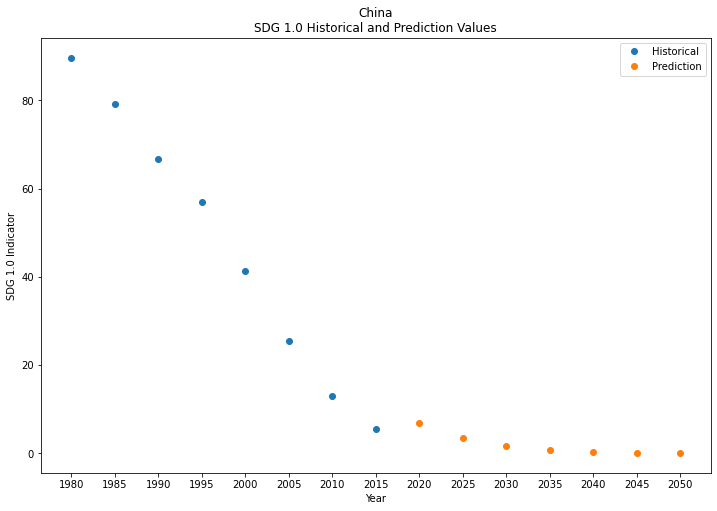

In [288]:
E.china.psdgpred(1.0)

Adicionalmente, se puede graficar lo anterior a "nivel global", esto para poder comparar la situación entre regiones.

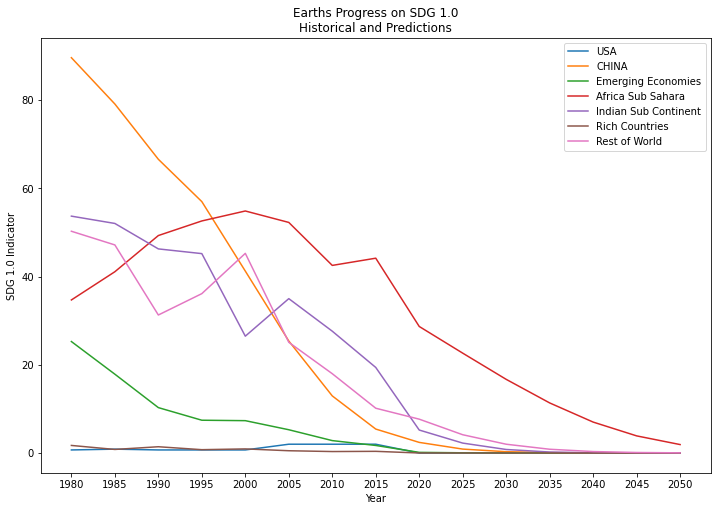

In [296]:
E.psdgpred(1.0)